In [117]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
from pylab import rcParams
from sklearn import preprocessing 
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import precision_score, recall_score
import seaborn as sb
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [22]:
%matplotlib inline 
rcParams['figure.figsize']=10,8

In [42]:
# Load the data
League_legend  = pd.read_csv (r'ML AHMED\Challenger_Ranked_Games_15minute.csv')

League_legend.head()

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,24081,1190,44,8.8,309,74,0,8,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,4247155821,1,24162,2212,46,9.2,393,64,0,5,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,4243963257,0,22413,1563,41,8.2,300,62,0,5,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,4241678498,0,23837,3197,46,9.2,370,96,0,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,4241538868,1,27688,3663,44,8.8,381,66,0,9,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0


In [43]:
# removing the columns we dont need 
League_legend=League_legend.drop(['gameId','redFirstTowerLane','redDragnoType','blueFirstTowerLane','blueDragnoType','redWins','redFirstBlood','blueFirstBlood','blueTotalLevel','redTotalLevel','blueAvgLevel','redAvgLevel'],axis=1)
League_legend.head()

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalMinionKills,blueTotalJungleMinionKills,blueKill,blueDeath,blueAssist,blueWardPlaced,blueWardKills,...,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds
0,0,24081,1190,309,74,8,14,14,29,8,...,1,0,2,1,0,1,0,1,2,1
1,1,24162,2212,393,64,5,6,5,31,6,...,1,0,1,0,1,0,0,0,0,0
2,0,22413,1563,300,62,5,20,8,28,7,...,1,0,4,2,1,1,0,1,2,1
3,0,23837,3197,370,96,6,13,9,108,9,...,1,0,1,0,1,0,0,0,0,1
4,1,27688,3663,381,66,9,10,10,36,11,...,1,0,2,1,0,1,0,0,0,0


In [44]:
League_legend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26834 entries, 0 to 26833
Data columns (total 39 columns):
blueWins                      26834 non-null int64
blueTotalGolds                26834 non-null int64
blueCurrentGolds              26834 non-null int64
blueTotalMinionKills          26834 non-null int64
blueTotalJungleMinionKills    26834 non-null int64
blueKill                      26834 non-null int64
blueDeath                     26834 non-null int64
blueAssist                    26834 non-null int64
blueWardPlaced                26834 non-null int64
blueWardKills                 26834 non-null int64
blueFirstTower                26834 non-null int64
blueFirstInhibitor            26834 non-null int64
blueTowerKills                26834 non-null int64
blueMidTowerKills             26834 non-null int64
blueTopTowerKills             26834 non-null int64
blueBotTowerKills             26834 non-null int64
blueInhibitor                 26834 non-null int64
blueFirstDragon         

In [45]:
League_legend.describe().T

,count,mean,std,min,25%,50%,75%,max
blueWins,26834.0,0.500186,0.500009,0.0,0.00,1.0,1.0,1.0
blueTotalGolds,26834.0,28498.258068,7946.940493,3627.0,24759.25,26827.5,29435.0,80503.0
blueCurrentGolds,26834.0,3478.691362,1576.997934,-4756.0,2375.00,3212.0,4298.0,16905.0
blueTotalMinionKills,26834.0,331.185436,70.619261,0.0,316.00,349.0,374.0,463.0
blueTotalJungleMinionKills,26834.0,71.557017,26.670098,0.0,64.00,76.0,87.0,210.0
blueKill,26834.0,13.181374,9.006977,0.0,8.00,11.0,16.0,92.0
blueDeath,26834.0,13.184691,9.036526,0.0,8.00,11.0,16.0,88.0
blueAssist,26834.0,18.786055,19.551170,0.0,9.00,14.0,20.0,173.0
blueWardPlaced,26834.0,37.908325,26.563145,0.0,28.00,33.0,41.0,1506.0
blueWardKills,26834.0,8.898338,4.922122,0.0,6.00,9.0,12.0,53.0


In [46]:
# Finding corr between the variables 
League_legend.corr()

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalMinionKills,blueTotalJungleMinionKills,blueKill,blueDeath,blueAssist,blueWardPlaced,blueWardKills,...,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds
blueWins,1.000000,0.224901,0.261419,0.160471,0.137586,0.279008,-0.257305,0.181491,0.037053,0.074630,...,-0.331914,-0.135008,-0.323409,-0.226201,-0.179915,-0.235856,-0.127347,-0.263398,-0.328984,-0.218904
blueTotalGolds,0.224901,1.000000,0.361081,-0.204588,-0.378815,0.917647,0.644921,0.813956,-0.012788,-0.285355,...,-0.106891,0.261740,0.121757,0.267329,-0.042462,-0.085142,0.299558,-0.247904,-0.237225,-0.265821
blueCurrentGolds,0.261419,0.361081,1.000000,-0.044816,-0.099573,0.377189,0.036718,0.307093,-0.005713,-0.101071,...,-0.142507,0.064825,-0.064168,0.017258,-0.074870,-0.104517,0.071789,-0.162829,-0.187928,-0.159718
blueTotalMinionKills,0.160471,-0.204588,-0.044816,1.000000,0.760043,-0.344912,-0.516276,-0.511196,0.251756,0.589491,...,-0.112033,-0.443095,-0.314173,-0.498982,0.021478,0.009720,-0.434124,0.176768,0.193291,0.093035
blueTotalJungleMinionKills,0.137586,-0.378815,-0.099573,0.760043,1.000000,-0.447452,-0.588026,-0.615481,0.245203,0.496209,...,-0.093271,-0.422644,-0.262568,-0.474072,0.054027,0.061008,-0.423927,0.131062,0.148912,0.081917
blueKill,0.279008,0.917647,0.377189,-0.344912,-0.447452,1.000000,0.583131,0.864785,-0.059116,-0.340180,...,-0.138689,0.238033,0.072259,0.238010,-0.074152,-0.125339,0.268516,-0.295071,-0.310749,-0.271090
blueDeath,-0.257305,0.644921,0.036718,-0.516276,-0.588026,0.583131,1.000000,0.595793,-0.102486,-0.424869,...,0.229450,0.421482,0.471463,0.532182,0.135348,0.155099,0.445892,-0.035645,0.015468,-0.040711
blueAssist,0.181491,0.813956,0.307093,-0.511196,-0.615481,0.864785,0.595793,1.000000,-0.133981,-0.381675,...,-0.077108,0.298105,0.069018,0.312422,-0.139006,-0.183980,0.321519,-0.298584,-0.316697,-0.228153
blueWardPlaced,0.037053,-0.012788,-0.005713,0.251756,0.245203,-0.059116,-0.102486,-0.133981,1.000000,0.183830,...,-0.019471,-0.133522,-0.058529,-0.139708,0.048306,0.030163,-0.125075,0.045524,0.054507,0.018226
blueWardKills,0.074630,-0.285355,-0.101071,0.589491,0.496209,-0.340180,-0.424869,-0.381675,0.183830,1.000000,...,-0.076640,-0.321655,-0.264849,-0.369551,-0.007766,-0.045706,-0.321018,0.127831,0.121364,0.081521


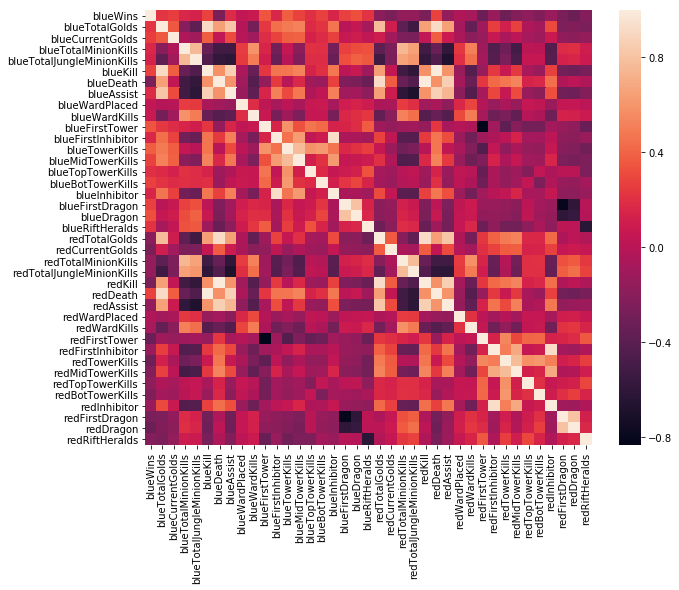

In [47]:
# heat map for the corr values 
sb.heatmap(League_legend.corr())

In [86]:
# choosing what goes in traning and what goes in the prediction 
x=League_legend.drop(['blueWins'],axis=1).values

y=League_legend[['blueWins']].values 


In [87]:
# scale the variables 
X = preprocessing.scale(x)


C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [88]:
# choosing train and test data
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=.2, random_state=17)

In [89]:
# choosing the KN method 
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


C:\Users\fatma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [90]:
# prediction and precision of the model 
y_pred= clf.predict(X_test)
y_expect = y_test

print(metrics.classification_report(y_expect, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.78      0.78      2659
          1       0.78      0.77      0.78      2708

avg / total       0.78      0.78      0.78      5367



In [93]:
# using random forest 
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

y_train_array = np.ravel(y_train)

classifier.fit(X_train, y_train_array)

y_pred = classifier.predict(X_test)

In [94]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80      2659
          1       0.80      0.80      0.80      2708

avg / total       0.80      0.80      0.80      5367



In [98]:
# using standard scaler SVC
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)


C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [99]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
y_pred = classifier.predict(X_test)


In [101]:
residuals = y_test - y_pred


In [102]:
residuals.mean()

0.0072666294019005035

In [106]:
accuracy_score(y_test, y_pred)


0.80193776784050685

In [107]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)


C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [108]:
accuracies.mean()


0.80220843492173743

In [111]:
# Testing LogReg
LogReg= LogisticRegression(solver='liblinear')
LogReg.fit(X_train,y_train)

C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
y_predict= LogReg.predict(X_test)

In [113]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.80      0.81      0.81      2659
          1       0.81      0.80      0.81      2708

avg / total       0.81      0.81      0.81      5367



In [115]:
# trying GaussianNB
gnb = GaussianNB()
y_predict = gnb.fit(X_train, y_train).predict(X_test)

C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.72      0.79      0.76      2659
          1       0.77      0.70      0.74      2708

avg / total       0.75      0.75      0.75      5367



In [118]:
# Decision tree testing 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train).predict(X_test)

In [119]:
print(classification_report(y_test,clf))

             precision    recall  f1-score   support

          0       0.72      0.73      0.72      2659
          1       0.73      0.72      0.72      2708

avg / total       0.72      0.72      0.72      5367



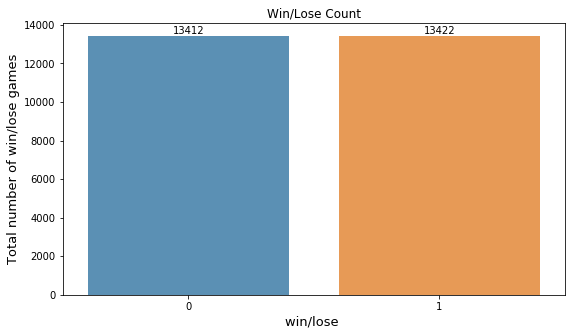

In [124]:
plot_ratings=League_legend['blueWins'].value_counts()
plot_ratings=plot_ratings.sort_index()
plt.figure(figsize=(9,5))

x= sb.barplot(plot_ratings.index, plot_ratings.values, alpha=0.8)
plt.title("Win/Lose Count")
plt.ylabel('Total number of win/lose games', fontsize=13)
plt.xlabel('win/lose ', fontsize=13)

values = x.patches
labels = plot_ratings.values
for value, label in zip(values, labels):
    height = value.get_height()
    x.text(value.get_x() + value.get_width()/2, height + 6, label, ha='center', va='bottom')

plt.show()



In [139]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


0.77864728898826163

In [137]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)

C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [138]:
pipe.score(X_test, y_test)

0.80193776784050685